In [1]:
from huggingface_hub import list_datasets
from datasets import load_dataset

In [2]:
from itertools import islice

all_datasets = list_datasets()

for dataset in all_datasets:
    print(dataset)
    break

[dataset.id for dataset in islice(all_datasets, 10)]

DatasetInfo(id='acronym_identification', author=None, sha='c3c245a18bbd57b1682b099e14460eebf154cbdf', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2023, 1, 25, 14, 18, 28, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=1160, likes=17, paperswithcode_id='acronym-identification', tags=['task_categories:token-classification', 'annotations_creators:expert-generated', 'language_creators:found', 'multilinguality:monolingual', 'size_categories:10K<n<100K', 'source_datasets:original', 'language:en', 'license:mit', 'acronym-identification', 'arxiv:2010.14678', 'region:us'], card_data=None, siblings=None)


['ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine']

In [3]:
emotions = load_dataset('emotion')

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
print(len(train_ds))
train_ds[0]

16000


{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [10]:
train_ds['label'][:5]

[0, 0, 3, 2, 3]

In [11]:
import pandas as pd

In [12]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [13]:
df['label_name'] = df['label'].apply(lambda i: emotions['train'].features['label'].int2str(i))
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


<Axes: ylabel='label_name'>

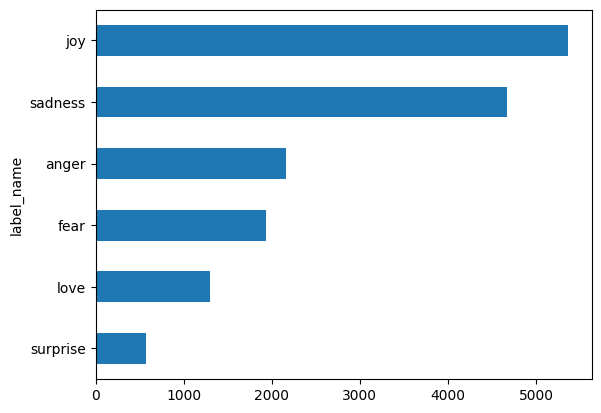

In [14]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

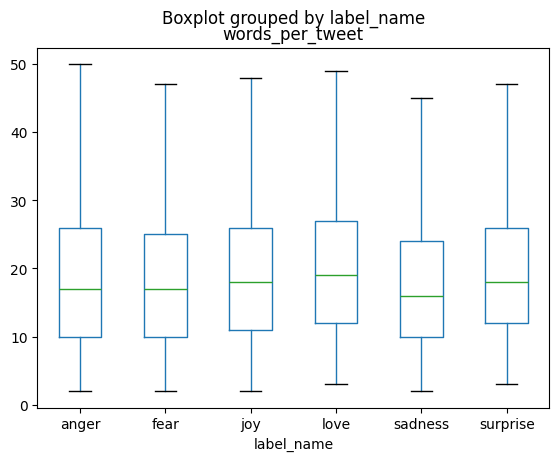

In [15]:
df['words_per_tweet'] = df['text'].str.split().apply(len)
df.boxplot(column='words_per_tweet', by='label_name', grid=False, showfliers=False)

In [16]:
emotions.reset_format()

In [17]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [18]:
token2idx = {c : i for i, c in enumerate(sorted(set(tokenized_text)))}
input_ids = [token2idx[t] for t in tokenized_text]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [19]:
input_ids = [token2idx[t] for t in tokenized_text]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [20]:
import torch
import torch.nn.functional as F

In [21]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [22]:
tokenized_text[0], input_ids[0], one_hot_encodings[0]

('T',
 tensor(5),
 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [23]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

In [24]:
from transformers import AutoTokenizer

model_checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [25]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [26]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [27]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [28]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [29]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [30]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [31]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [32]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [33]:
from transformers import AutoModel

model_checkpoint = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_checkpoint).to(device)
device

device(type='cuda')

In [34]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(inputs)
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs.input_ids[0])))

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
[CLS] this is a test [SEP]


In [35]:
inputs = {k : v.to(device) for k, v in inputs.items()}
print(inputs)
with torch.no_grad():
    outputs = model(**inputs)
outputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [36]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [37]:
outputs.last_hidden_state[:, 0]

tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8619e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8742e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1380e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6628e-02,
          2.1525e-01,  4.4381e-02,  3.9334e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-01,  1.5015e-02,  2.

In [38]:
def extract_hidden_states(batch_encoded):
    #batch_encoded = tokenizer(batch['text'], return_tensors='pt', padding=True, truncation=True)
    inputs = {k : v.to(device) for k, v in batch_encoded.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs = model(**inputs)
    return {'hidden_state': outputs.last_hidden_state[:, 0]}

emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [39]:
emotions_hidden['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

In [40]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [41]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb

,X,Y,label
0,4.187442,6.984414,0
1,-3.233189,6.374863,0
2,5.349175,3.538334,3
3,-2.407228,4.228002,2
4,-3.576177,4.281226,3
...,...,...,...
15995,-0.659950,7.400764,0
15996,-2.234582,6.013765,0
15997,-2.650708,3.720140,1
15998,5.077559,4.002808,3


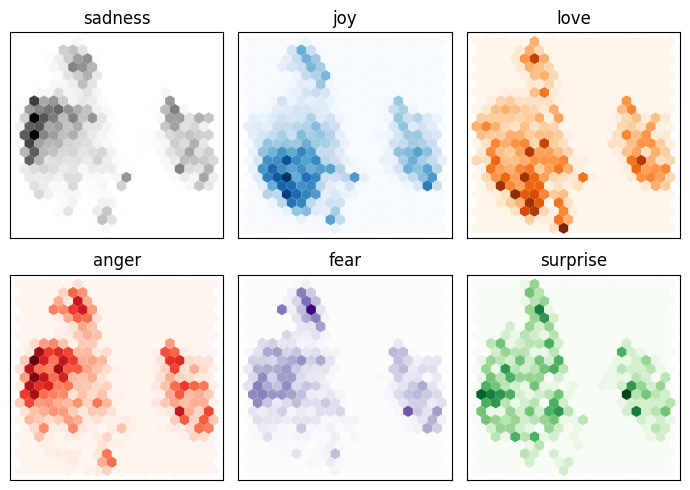

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()

cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap, gridsize=20, linewidth=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

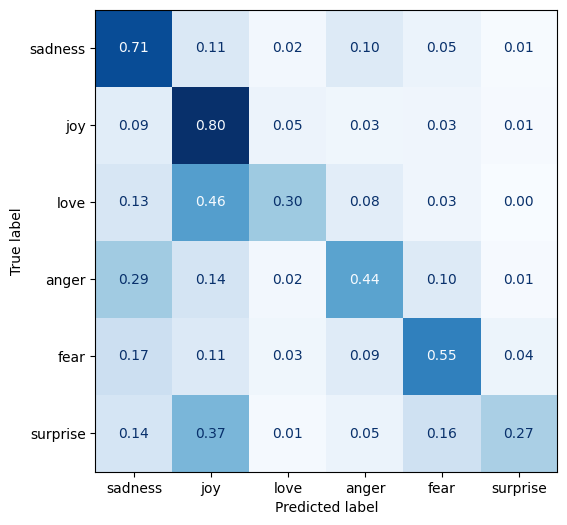

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_hat, y_true, labels):
    cm = confusion_matrix(y_true, y_hat, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.show()

y_hat = lr_clf.predict(X_valid)
plot_confusion_matrix(y_hat, y_valid, labels)

In [46]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    y_true = pred.label_ids
    y_hat = pred.predictions.argmax(-1)
    acc = accuracy_score(y_true, y_hat)
    f1 = f1_score(y_true, y_hat, average='weighted')
    return {'accuracy': acc, 
            'f1': f1}

In [48]:
from huggingface_hub import notebook_login

notebook_login()

In [91]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f'{model_checkpoint}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level='error')

In [92]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)
trainer.train()

trainer.predict(emotions_encoded['train']).metrics


Epoch,Training Loss,Validation Loss


{'test_loss': 0.08254486322402954,
 'test_accuracy': 0.9656875,
 'test_f1': 0.9657665104282068,
 'test_runtime': 4.9462,
 'test_samples_per_second': 3234.837,
 'test_steps_per_second': 50.544}

In [93]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output.metrics

{'test_loss': 0.1541660726070404,
 'test_accuracy': 0.936,
 'test_f1': 0.9358567652903533,
 'test_runtime': 0.5276,
 'test_samples_per_second': 3790.659,
 'test_steps_per_second': 60.651}

In [94]:
y_hat = np.argmax(preds_output.predictions, axis=1)

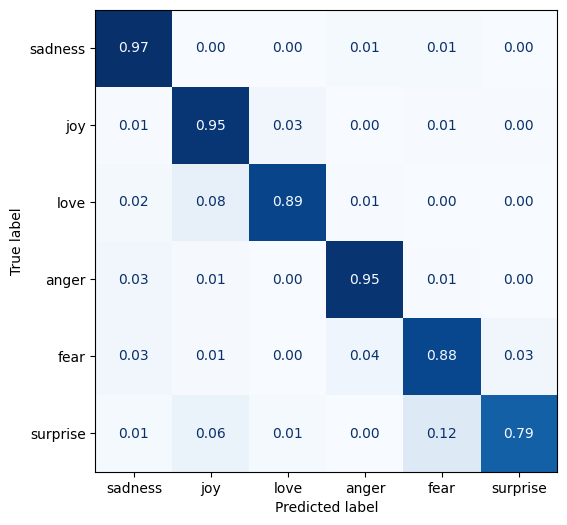

In [95]:
plot_confusion_matrix(y_hat, y_valid, labels)

In [96]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k : v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        y_hat = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')
    return {'loss': loss, 'predicted_label': y_hat}

emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [97]:
outputs = model(**inputs)
print(outputs.logits)
cross_entropy(outputs.logits, torch.tensor([1]).to(device))

tensor([[ 0.5061,  0.7928, -1.8058,  1.2001,  0.3112, -1.6323]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


tensor(1.3948, device='cuda:0', grad_fn=<NllLossBackward0>)

In [98]:
torch.log(torch.softmax(outputs.logits, dim=1))

tensor([[-1.6815, -1.3948, -3.9934, -0.9875, -1.8764, -3.8199]],
       device='cuda:0', grad_fn=<LogBackward0>)

In [99]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [100]:
emotions_encoded['validation']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
    num_rows: 2000
})

In [102]:
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
for label in ['label', 'predicted_label']:
    df_test[label] = df_test[label].apply(lambda i: emotions['train'].features['label'].int2str(i))

df_test.sort_values('loss', ascending=False)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,7.211697
882,i feel badly about reneging on my commitment t...,love,sadness,7.139095
318,i felt ashamed of these feelings and was scare...,fear,sadness,6.903402
1111,im lazy my characters fall into categories of ...,joy,fear,6.643702
1963,i called myself pro life and voted for perry w...,joy,sadness,6.321985
...,...,...,...,...
1619,i sat in the car and read my book which suited...,joy,joy,0.002391
1310,i feel like an ungrateful asshole,sadness,sadness,0.002387
1205,i log on feeling vaguely sociable and after a ...,joy,joy,0.002378
723,i was able to go to a st party i am back feeli...,joy,joy,0.002366


In [104]:
trainer.push_to_hub(commit_message='Training completed')

CommitInfo(commit_url='https://huggingface.co/ryli/distilbert-base-uncased-finetuned-emotion/commit/3a8abb48eb73e3cdd44b19acd51c9f174be0cfde', commit_message='Training completed', commit_description='', oid='3a8abb48eb73e3cdd44b19acd51c9f174be0cfde', pr_url=None, pr_revision=None, pr_num=None)

In [105]:
from transformers import pipeline
model_id = 'ryli/distilbert-base-uncased-finetuned-emotion'
classifier = pipeline('text-classification', model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [108]:
custom_tweet = 'I saw a movie today and it was really good.'
preds = classifier(custom_tweet, top_k=None)
preds

[{'label': 'LABEL_1', 'score': 0.9694868326187134},
 {'label': 'LABEL_0', 'score': 0.013138658367097378},
 {'label': 'LABEL_3', 'score': 0.00857408158481121},
 {'label': 'LABEL_4', 'score': 0.004348861984908581},
 {'label': 'LABEL_2', 'score': 0.0028515851590782404},
 {'label': 'LABEL_5', 'score': 0.0016000247560441494}]

<BarContainer object of 6 artists>

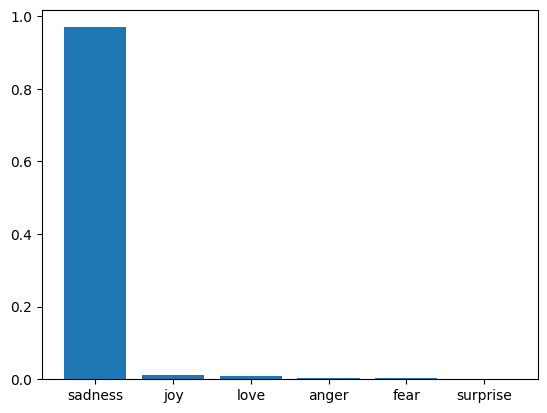

In [119]:
preds_df = pd.DataFrame(preds)
plt.bar(labels, preds_df['score'])

In [118]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']